# Penalized Regression

## Importing Packages

In [ ]:
import numpy as np
import pandas as pd

## Reading-In Data

In [ ]:
df_ml = pd.read_csv('../data/data_ml.csv')
pd.set_option('display.max_rows', 101)
df_ml.head().T

,0,1,2,3,4
stock_id,13,13,13,17,17
date,2006-12-31,2007-01-31,2007-02-28,2015-03-31,2015-04-30
Advt_12M_Usd,0.25,0.25,0.26,0.73,0.72
Advt_3M_Usd,0.33,0.32,0.3,0.64,0.62
Advt_6M_Usd,0.27,0.28,0.3,0.7,0.66
Asset_Turnover,0.22,0.22,0.22,0.4,0.4
Bb_Yld,0.33,0.4,0.15,0.47,0.46
Bv,0.01,0.01,0.01,0.01,0.01
Capex_Ps_Cf,0.13,0.13,0.13,0.7,0.7
Capex_Sales,0.84,0.84,0.84,0.74,0.74


## Separating Features and Lables

In [ ]:
columns_to_drop = [
    'stock_id', 'date', # non-feature identifiers
    'R1M_Usd', 'R3M_Usd', 'R6M_Usd', 'R12M_Usd', # numerical labels
    'R1M_Usd_C', 'R12M_Usd_C' # categorical labels
]

features = list(df_ml.drop(columns=columns_to_drop).columns)

In [ ]:
X = df_ml[features] #features
y = df_ml['R1M_Usd'] #label

## Importing Model Classes

In [ ]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

## Lasso

### Fitting Model for Different Values of `alpha`

In [ ]:
alphas = np.arange(1e-4, 1.0e-3, 1e-5) # setting various levels of alpha
lasso_res = {} # creating a dict that will store model coefficients 

for alpha in alphas: # looping through the different alphas/lambdas values
  lasso = Lasso(alpha=alpha) # model
  lasso.fit(X, y) 
  lasso_res[alpha] = lasso.coef_ # extract LASSO coefs

### Clever Way to Display the Coefficients for Different Values of `alpha`

In [ ]:
df_lasso_res = pd.DataFrame(lasso_res).T
df_lasso_res.columns = features
df_lasso_res

,Advt_12M_Usd,Advt_3M_Usd,Advt_6M_Usd,Asset_Turnover,Bb_Yld,Bv,Capex_Ps_Cf,Capex_Sales,Cash_Div_Cf,Cash_Per_Share,...,Share_Turn_6M,Ta,Tev_Less_Mktcap,Tot_Debt_Rev,Total_Capital,Total_Debt,Total_Debt_Capital,Total_Liabilities_Total_Assets,Vol1Y_Usd,Vol3Y_Usd
0.00010,-0.0,-0.001124,-0.0,-0.0,0.001059,-0.0,-0.0,-0.0,-0.005706,-0.001028,...,-0.0,-0.0,0.0,0.0,0.0,0.000198,0.000084,0.004738,0.001560,0.006134
0.00011,-0.0,-0.000554,-0.0,0.0,0.000903,-0.0,-0.0,-0.0,-0.004716,-0.000383,...,-0.0,-0.0,0.0,0.0,0.0,0.000000,0.000194,0.004500,0.001377,0.005965
0.00012,-0.0,-0.000000,-0.0,0.0,0.000763,-0.0,-0.0,-0.0,-0.003714,-0.000007,...,-0.0,-0.0,0.0,0.0,0.0,0.000000,0.000248,0.004172,0.001205,0.005813
0.00013,-0.0,-0.000000,-0.0,0.0,0.000632,-0.0,-0.0,-0.0,-0.002757,-0.000011,...,-0.0,-0.0,0.0,0.0,0.0,0.000000,0.000302,0.003832,0.001120,0.005702
0.00014,-0.0,-0.000000,-0.0,0.0,0.000490,-0.0,-0.0,-0.0,-0.002026,-0.000000,...,-0.0,-0.0,0.0,0.0,0.0,0.000000,0.000272,0.003660,0.001100,0.005592
0.00015,-0.0,-0.000000,-0.0,0.0,0.000362,-0.0,-0.0,-0.0,-0.001904,-0.000000,...,-0.0,-0.0,0.0,0.0,0.0,0.000000,0.000347,0.003510,0.001098,0.005575
0.00016,-0.0,-0.000000,-0.0,0.0,0.000234,-0.0,-0.0,-0.0,-0.001775,-0.000000,...,-0.0,-0.0,0.0,0.0,0.0,0.000000,0.000443,0.003340,0.001085,0.005562
0.00017,-0.0,-0.000000,-0.0,0.0,0.000103,-0.0,-0.0,-0.0,-0.001655,-0.000000,...,-0.0,-0.0,0.0,0.0,0.0,0.000000,0.000535,0.003162,0.001072,0.005554
0.00018,-0.0,-0.000000,-0.0,0.0,0.000000,-0.0,-0.0,-0.0,-0.001532,-0.000000,...,-0.0,-0.0,0.0,0.0,0.0,0.000000,0.000628,0.002984,0.001061,0.005548
0.00019,-0.0,-0.000000,-0.0,0.0,0.000000,-0.0,-0.0,-0.0,-0.001386,-0.000000,...,-0.0,-0.0,0.0,0.0,0.0,0.000000,0.000712,0.002763,0.001057,0.005540


### Keeping the 12 predictors with largest effect Sizes

In [ ]:
predictors = df_lasso_res.abs().sum().sort_values(ascending=False).head(12).index.to_list()
predictors.sort()
predictors

['Eps',
 'Interest_Expense',
 'Mkt_Cap_3M_Usd',
 'Mom_11M_Usd',
 'Mom_5M_Usd',
 'Net_Margin',
 'Pb',
 'Pe',
 'Recurring_Earning_Total_Assets',
 'Total_Liabilities_Total_Assets',
 'Vol1Y_Usd',
 'Vol3Y_Usd']

### Plotting the Coefficients for Different Values of `alpha`

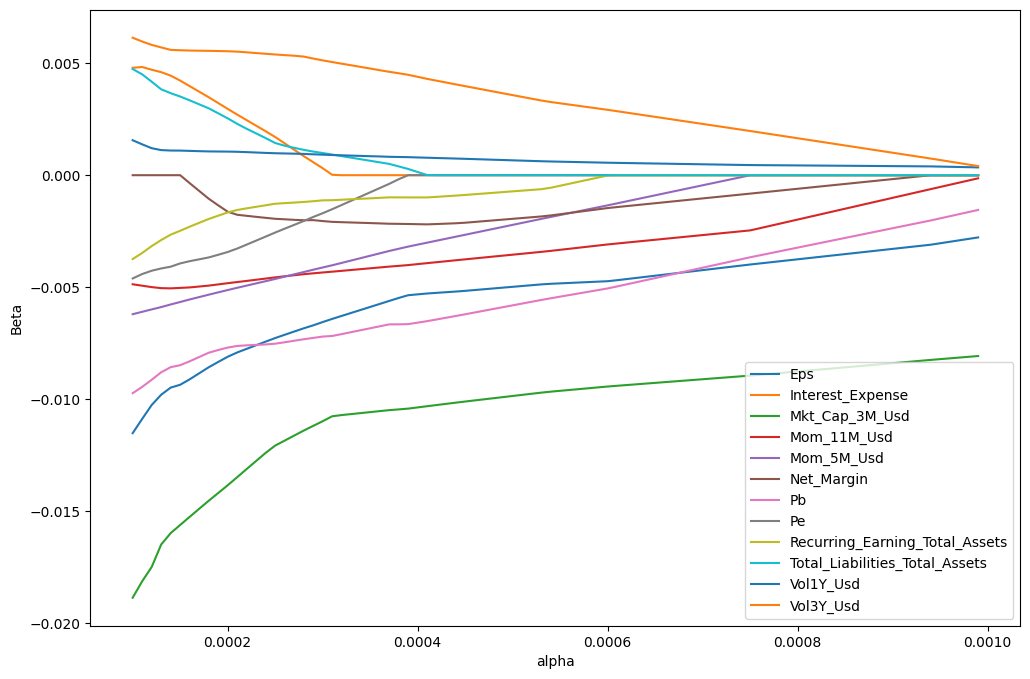

In [ ]:
df_lasso_res.loc[:,predictors].plot(xlabel='alpha', ylabel='Beta', figsize=(12,8));

## Ridge

### Fitting Model for Different Values of `alpha`

In [ ]:
n_alphas = 50
alphas = np.logspace(-2, 4, n_alphas) # transforming to log scale
ridge_res = {} # creating a dict that will hold the model's results 

for alpha in alphas: # looping through different alpha values
  ridge = Ridge(alpha=alpha) # model
  ridge.fit(X, y) # fit the model
  ridge_res[alpha] = ridge.coef_ # extract Ridge coefficients

### Clever Way to Display the Coefficients for Different Values of `alpha`

In [ ]:
df_ridge_res = pd.DataFrame(ridge_res).T # transpose the dataframe for plotting
df_ridge_res.columns = features # adding the names of the factors
#df_ridge_res

### Plotting the Coefficients for Different Values of `alpha`

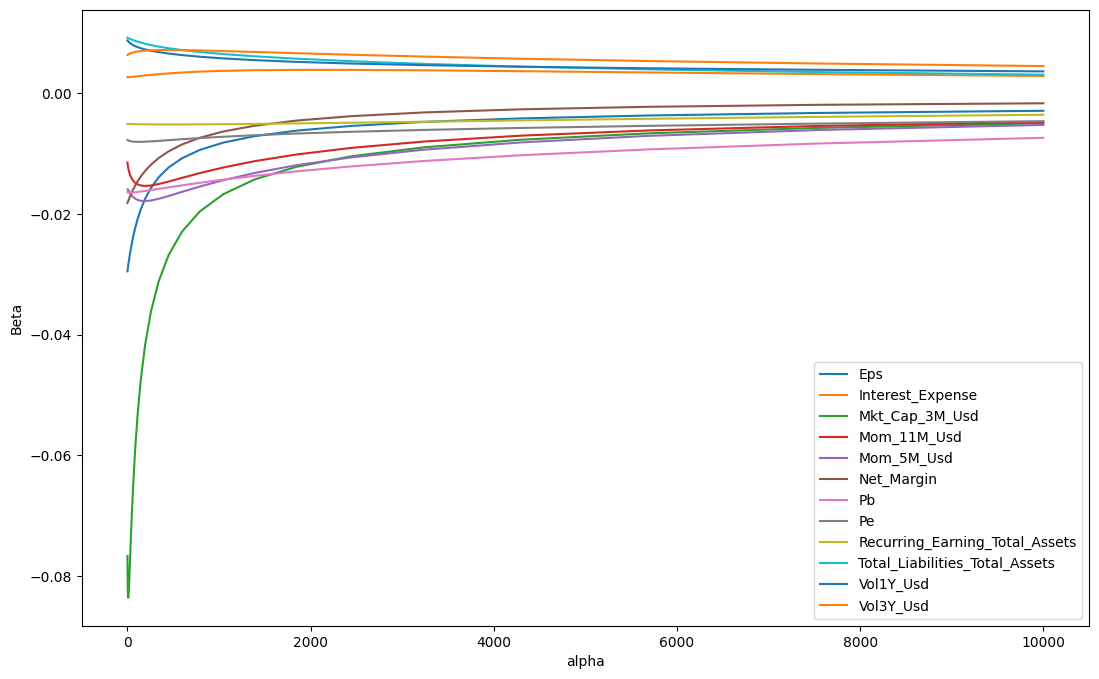

In [ ]:
df_ridge_res.loc[:,predictors].plot(xlabel='alpha',ylabel='Beta',figsize=(13,8));

## Elastic-Net Out-of-Sample Hit Rate

Doing a train-test-split on the data.

In [ ]:
separation_date = '2014-01-15'
df_train = df_ml.query('date < @separation_date')
df_test = df_ml.query('date >= @separation_date')

Separating out features and labels

In [ ]:
# training data
X_train = df_train[features]
y_train = df_train['R1M_Usd']

# testing data
X_test = df_test[features] 
y_test = df_test['R1M_Usd']

Fitting one elastic net model

In [ ]:
model = ElasticNet(alpha=0.1, l1_ratio=0.1) # model
model.fit(X_train, y_train)

ElasticNet(alpha=0.1, l1_ratio=0.1)

Calculating the out-of-sample hit ratio.

In [ ]:
hit_ratio = np.mean(model.predict(X_test) * y_test > 0)
print(f'Hit Ratio: {hit_ratio}')

Hit Ratio: 0.5460346399270738


Notice that something is kind of fucked up with the model and it is always predicting the same thing for everything.  Maybe need to inform the authors.

In [ ]:
#np.mean(y_test > 0)
model.predict(X_test)

array([0.01367513, 0.01367513, 0.01367513, ..., 0.01367513, 0.01367513,
       0.01367513])

In [ ]:
np.unique(model.predict(X_test))

array([0.01367513])

## Using Only the Twelve Most Relevant Predictors

In [ ]:
# training data
X_train = df_train[predictors]
y_train = df_train['R1M_Usd']

# testing data
X_test = df_test[predictors] 
y_test = df_test['R1M_Usd']

In [ ]:
model = ElasticNet(alpha=0.1, l1_ratio=0.1) # model
model.fit(X_train, y_train)

ElasticNet(alpha=0.1, l1_ratio=0.1)

In [ ]:
hit_ratio = np.mean(model.predict(X_test) * y_test > 0)
print(f'Hit Ratio: {hit_ratio}')

Hit Ratio: 0.5460346399270738


In [ ]:
#np.mean(y_test > 0)
model.predict(X_test)

array([0.01367513, 0.01367513, 0.01367513, ..., 0.01367513, 0.01367513,
       0.01367513])

In [ ]:
np.unique(model.predict(X_test))

array([0.01367513])

## Vanilla Linear Regression

In [ ]:
# training data
X_train = df_train[predictors]
y_train = df_train['R1M_Usd']

# testing data
X_test = df_test[predictors] 
y_test = df_test['R1M_Usd']

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression() # model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
hit_ratio = np.mean(model.predict(X_test) * y_test > 0)
print(f'Hit Ratio: {hit_ratio}')

Hit Ratio: 0.5262790565177757


In [ ]:
#np.mean(y_test > 0)
model.predict(X_test)

array([0.04515952, 0.04576565, 0.0459677 , ..., 0.01146721, 0.00876234,
       0.00914041])

In [ ]:
np.unique(model.predict(X_test))

array([-0.02727745, -0.02691321, -0.0266342 , ...,  0.05302695,
        0.05330783,  0.05341028])

In [ ]:
np.mean(model.predict(X_test) > 0)

0.8710260938924339

In [ ]:
np.mean(model.predict(X_test))

0.01367678741727611

In [ ]:
np.mean(y_test)

0.009377250455788515

In [ ]:
np.mean(y_test > 0)

0.5460346399270738

In [ ]:
np.sort(df_ml['date'].unique())

array(['1999-12-31', '2000-01-31', '2000-02-29', '2000-03-31',
       '2000-04-30', '2000-05-31', '2000-06-30', '2000-07-31',
       '2000-08-31', '2000-09-30', '2000-10-31', '2000-11-30',
       '2000-12-31', '2001-01-31', '2001-02-28', '2001-03-31',
       '2001-04-30', '2001-05-31', '2001-06-30', '2001-07-31',
       '2001-08-31', '2001-09-30', '2001-10-31', '2001-11-30',
       '2001-12-31', '2002-01-31', '2002-02-28', '2002-03-31',
       '2002-04-30', '2002-05-31', '2002-06-30', '2002-07-31',
       '2002-08-31', '2002-09-30', '2002-10-31', '2002-11-30',
       '2002-12-31', '2003-01-31', '2003-02-28', '2003-03-31',
       '2003-04-30', '2003-05-31', '2003-06-30', '2003-07-31',
       '2003-08-31', '2003-09-30', '2003-10-31', '2003-11-30',
       '2003-12-31', '2004-01-31', '2004-02-29', '2004-03-31',
       '2004-04-30', '2004-05-31', '2004-06-30', '2004-07-31',
       '2004-08-31', '2004-09-30', '2004-10-31', '2004-11-30',
       '2004-12-31', '2005-01-31', '2005-02-28', '2005-

In [ ]:
df_ml.groupby(['date'])[['R1M_Usd']].mean()

,R1M_Usd
date,
1999-12-31,-0.032521
2000-01-31,0.021098
2000-02-29,0.064126
2000-03-31,0.013529
2000-04-30,-0.007193
...,...
2018-08-31,-0.012017
2018-09-30,-0.082999
2018-10-31,0.024452


## Exercise

On the test sample -  evaluate the impact of the two elastic net parameters on out-of-sample accuracy.

This entail fitting the model for various values of the parameters and checking the out of sample hit-rate.  You should do this exercise.

In [ ]:
# training data
X_train = df_train[features]
y_train = df_train['R1M_Usd']

# testing data
X_test = df_test[features] 
y_test = df_test['R1M_Usd']


alphas = [0.001, 0.01, 0.1, 1, 10]
l1_ratios = [0.001, 0.01, 0.1, 1]

alpha_store = []
l1_ratio_store = []
hit_ratio_store = []
num_unique_store = []
for ix_alpha in alphas:
    for ix_l1 in l1_ratios:
        model = ElasticNet(alpha=ix_alpha, l1_ratio=ix_l1) # model
        model.fit(X_train, y_train)
        hit_ratio = np.mean(model.predict(X_test) * y_test > 0)
        alpha_store.append(ix_alpha)
        l1_ratio_store.append(ix_l1)
        hit_ratio_store.append(hit_ratio)
        num_unique_store.append(len(np.unique(model.predict(X_test))))
        
        print(ix_alpha, ix_l1)

df_results = pd.DataFrame({
    "alpha": alpha_store,
    "l1_ratio": l1_ratio_store,
    "hit_ratio": hit_ratio_store,
    "unique_predictions": num_unique_store,
})

df_results

In [ ]:
X_test

In [ ]:
np.mean(y_test > 0)

In [ ]:
model = ElasticNet(alpha=0.01, l1_ratio=0.01) # model
model.fit(X_train, y_train)

In [ ]:
np.mean(model.predict(X_test) > 0)

In [ ]:
y_test.mean()

In [ ]:
model.predict(X_test).mean()

## OLD CODE

In [ ]:
# pd.options.display.max_seq_items = 200
# print(df_ml.columns)

In [ ]:
#df_ml.drop(columns=columns_to_drop).columns

In [ ]:
# this first line is how they do it in the book and it seems to be wrong
#features = list(df_ml.iloc[:,3:95].columns) # Keep the feature's column names (hard-coded, beware!)


# features_short = [
#     'Div_Yld',
#     'Eps', 
#     'Mkt_Cap_12M_Usd', 
#     'Mom_11M_Usd', 
#     'Ocf',
#     'Pb', 
#     'Vol1Y_Usd',
# ]